# Goals

### 1. Learn to implement Squeezenet Fire Block using monk
    - Monk's Keras
    - Monk's Pytorch
    - Monk's Mxnet
    
### 2. Use network Monk's debugger to create complex blocks 


### 3. Understand how syntactically different it is to implement the same using
    - Traditional Keras
    - Traditional Pytorch
    - Traditional Mxnet

# Squeezenet Fire Block
 
 - Note: The block structure can have variations too, this is just an example

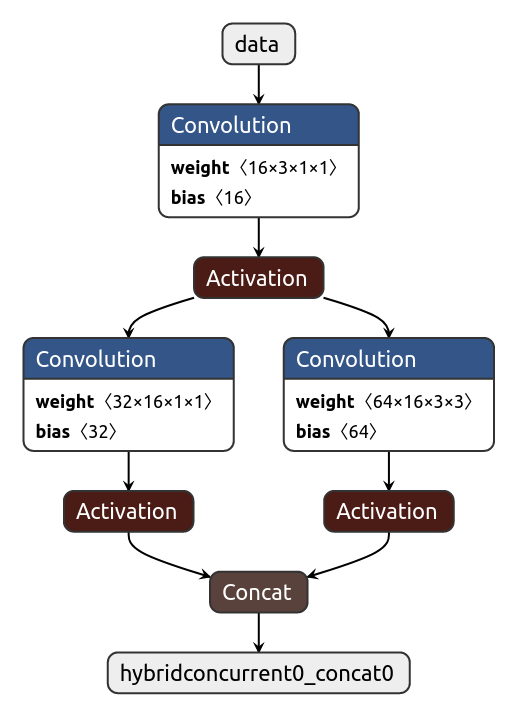

In [6]:
from IPython.display import Image
Image(filename='imgs/squeezenet_fire.png')

# Table of contents

[1. Install Monk](#1)


[2. Block basic Information](#2)

  - [2.1) Visual structure](#2-1)
  
  - [2.2) Layers in Branches](#2-2)


[3) Creating Block using monk visual debugger](#3)

  - [3.1) Create the first branch](#3-1)

  - [3.2) Create the second branch](#3-2)
  
  - [3.3) Merge the branches](#3-3)
  
  - [3.4) Debug the merged network](#3-4)
  
  - [3.5) Compile the network](#3-5)
  
  - [3.6) Visualize the network](#3-6)
  
  - [3.7) Run data through the network](#3-7)
  
  
[4) Creating Block Using MONK one line API call](#4)

  - [Mxnet Backend](#4-1)
  
  - [Pytorch Backend](#4-2)
  
  - [Keras Backend](#4-3)
  
  
  
[5) Appendix](#5)

  - [Study Material](#5-1)
  
  - [Creating block using traditional Mxnet](#5-2)
  
  - [Creating block using traditional Pytorch](#5-3)
  
  - [Creating block using traditional Keras](#5-4)
    

<a id='1'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [ ]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

# Imports

In [1]:
# Common
import numpy as np
import math
import netron
from collections import OrderedDict
from functools import partial

In [2]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

<a id='2'></a>
# Block Information

<a id='2_1'></a>
## Visual structure

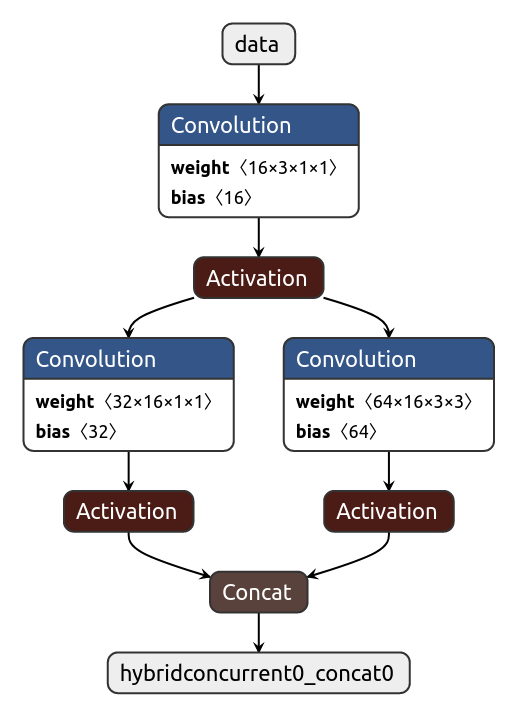

In [7]:
from IPython.display import Image
Image(filename='imgs/squeezenet_fire.png')

<a id='2_2'></a>
## Layers in Branches

  - Number of branches: 2
  
  
  - Common Layer
    - conv_1_1 -> relu
  
  
  - Branch 1
    - conv_1x1 -> relu
  
  
  - Branch 2
    - conv_3x3 -> relu
    
    
  - Branches merged using
    - Concatenation
    
    
(See Appendix to read blogs on squeezenets)

<a id='3'></a>
# Creating Block using monk debugger

In [8]:
# Imports and setup a project
# To use pytorch backend - replace gluon_prototype with pytorch_prototype
# To use keras backend - replace gluon_prototype with keras_prototype

from gluon_prototype import prototype

# Create a sample project
gtf = prototype(verbose=1);
gtf.Prototype("sample-project-1", "sample-experiment-1");

Mxnet Version: 1.5.1

Experiment Details
    Project: sample-project-1
    Experiment: sample-experiment-1
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/blocks/workspace/sample-project-1/sample-experiment-1/



<a id='3-1'></a>
## Create the first branch

In [9]:
def first_branch(expand_channels_1x1=32, stride=1):
    network = [];
    network.append(gtf.convolution(output_channels=expand_channels_1x1, kernel_size=1, stride=stride));
    network.append(gtf.relu());
    return network;

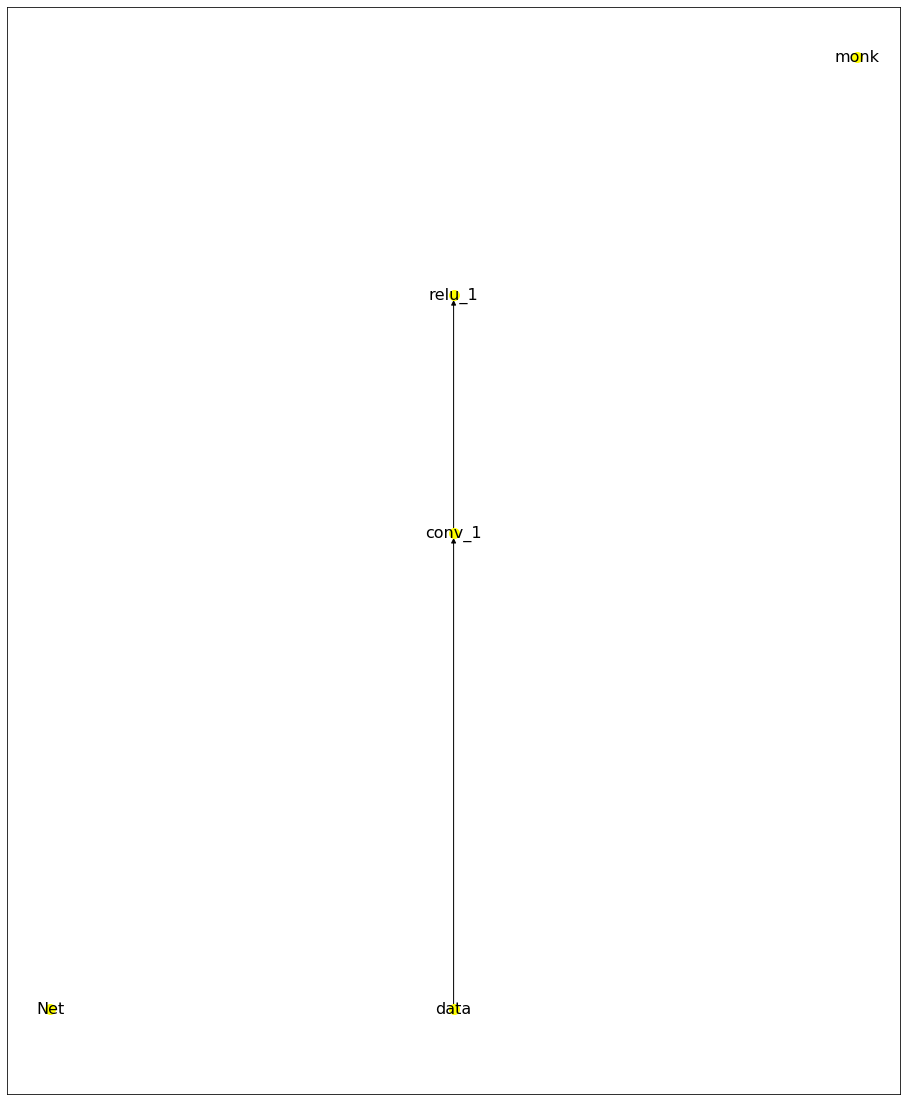

In [11]:
# Debug the branch
branch_1 = first_branch(expand_channels_1x1=32, stride=1)
network = [];
network.append(branch_1);
gtf.debug_custom_model_design(network);

<a id='3-2'></a>
## Create the second branch

In [12]:
def second_branch(expand_channels_3x3=64, stride=1):
    network = [];
    network.append(gtf.convolution(output_channels=expand_channels_3x3, kernel_size=1, stride=stride));
    network.append(gtf.relu());
    return network;

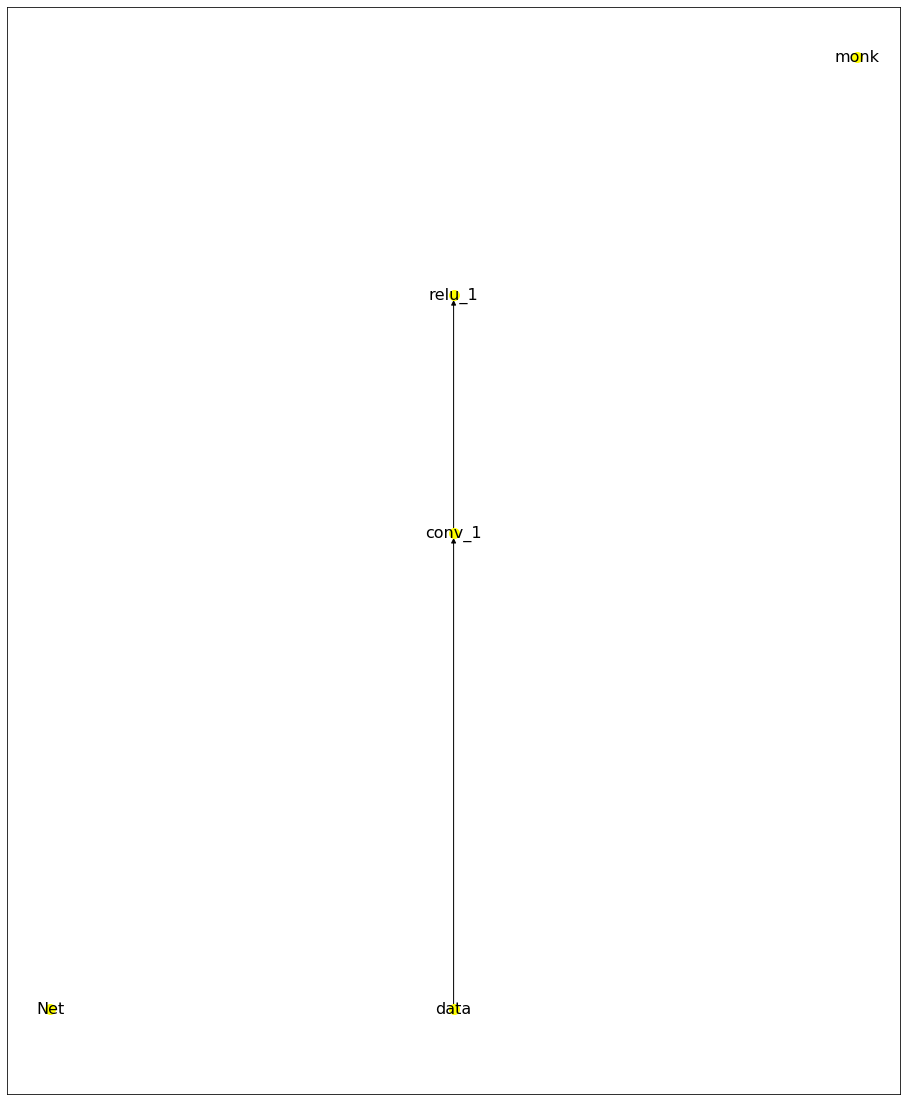

In [14]:
# Debug the branch
branch_2 = second_branch(expand_channels_3x3=64, stride=1)
network = [];
network.append(branch_2);
gtf.debug_custom_model_design(network);

<a id='3-3'></a>
## Merge the branches

In [15]:

def final_block(squeeze_channels=16, expand_channels_1x1=32, expand_channels_3x3=64):
    network = [];
    
    network.append(gtf.convolution(output_channels=squeeze_channels, kernel_size=1, stride=1));
    network.append(gtf.relu());
    
    #Create subnetwork and add branches
    subnetwork = [];
    branch_1 = first_branch(expand_channels_1x1=expand_channels_1x1, stride=1)
    branch_2 = second_branch(expand_channels_3x3=expand_channels_3x3, stride=1)
    subnetwork.append(branch_1);
    subnetwork.append(branch_2);
    
    # Add merging element
    subnetwork.append(gtf.concatenate());
    
    # Add the subnetwork
    network.append(subnetwork);
    return network;

<a id='3-4'></a>
## Debug the merged network

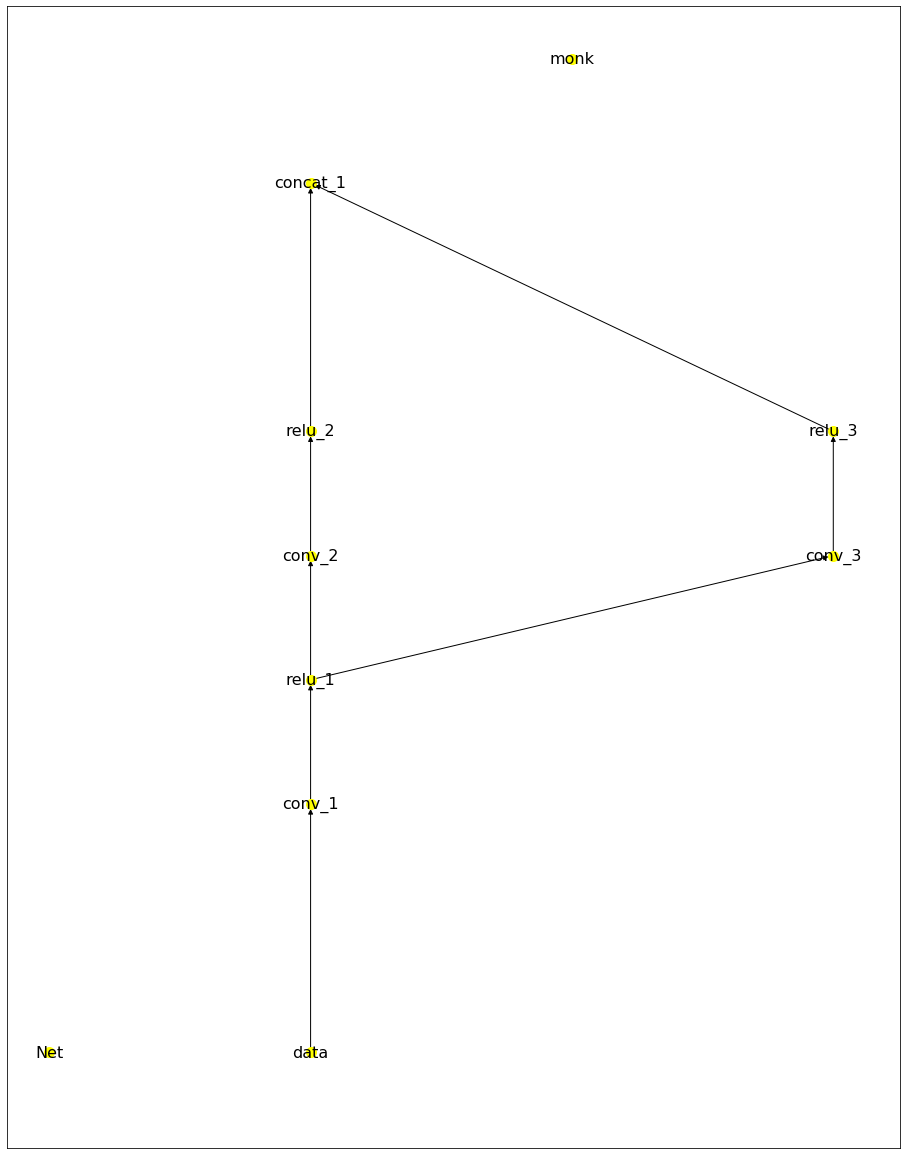

In [17]:
final = final_block(squeeze_channels=16, expand_channels_1x1=32, expand_channels_3x3=64)
network = [];
network.append(final);
gtf.debug_custom_model_design(network);

<a id='3-5'></a>
## Compile the network

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           Custom Model
        Num of potentially trainable layers:  3
        Num of actual trainable layers:       3



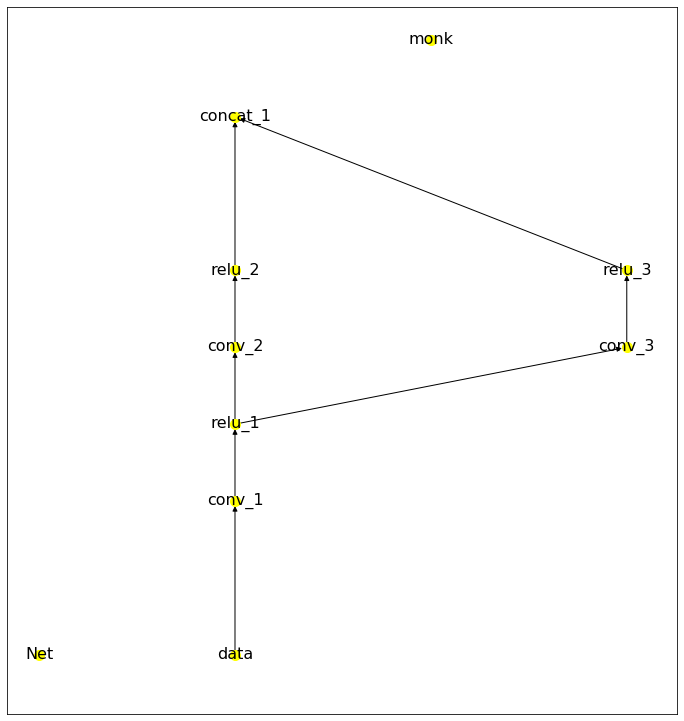

In [18]:
gtf.Compile_Network(network, data_shape=(3, 224, 224), use_gpu=False);

<a id='3-6'></a>
## Run data through the network

In [19]:
import mxnet as mx
x = np.zeros((1, 3, 224, 224));
x = mx.nd.array(x);
y = gtf.system_dict["local"]["model"].forward(x);
print(x.shape, y.shape)

(1, 3, 224, 224) (1, 96, 224, 224)


<a id='3-7'></a>
## Visualize network using netron

In [20]:
gtf.Visualize_With_Netron(data_shape=(3, 224, 224))

Using Netron To Visualize
Not compatible on kaggle
Compatible only for Jupyter Notebooks

Stopping http://localhost:8080
Serving 'model-symbol.json' at http://localhost:8080


<a id='4'></a>
# Creating Using MONK LOW code API

<a id='4-1'></a>
## Mxnet backend

Mxnet Version: 1.5.1

Experiment Details
    Project: sample-project-1
    Experiment: sample-experiment-1
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/blocks/workspace/sample-project-1/sample-experiment-1/

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           Custom Model
        Num of potentially trainable layers:  3
        Num of actual trainable layers:       3



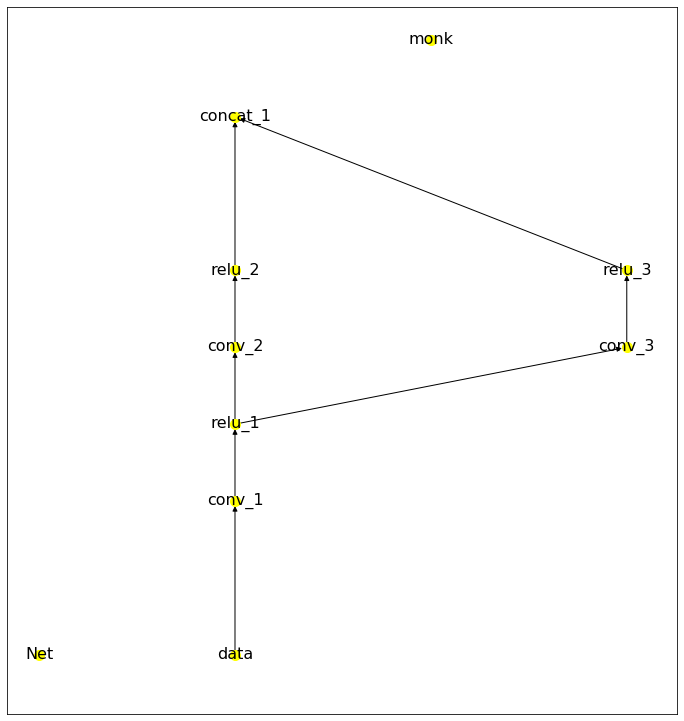

In [21]:
from gluon_prototype import prototype
gtf = prototype(verbose=1);
gtf.Prototype("sample-project-1", "sample-experiment-1");


network = [];

# Single line addition of blocks
network.append(gtf.squeezenet_fire_block(squeeze_channels=16, 
                                         expand_channels_1x1=32, 
                                         expand_channels_3x3=64));


gtf.Compile_Network(network, data_shape=(3, 224, 224), use_gpu=False);


<a id='4-2'></a>
## Pytorch backend

  - Only the import changes

Pytorch Version: 1.2.0

Experiment Details
    Project: sample-project-1
    Experiment: sample-experiment-1
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/blocks/workspace/sample-project-1/sample-experiment-1/

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           Custom Model
        Num layers in model:  3
        Num trainable layers: 3



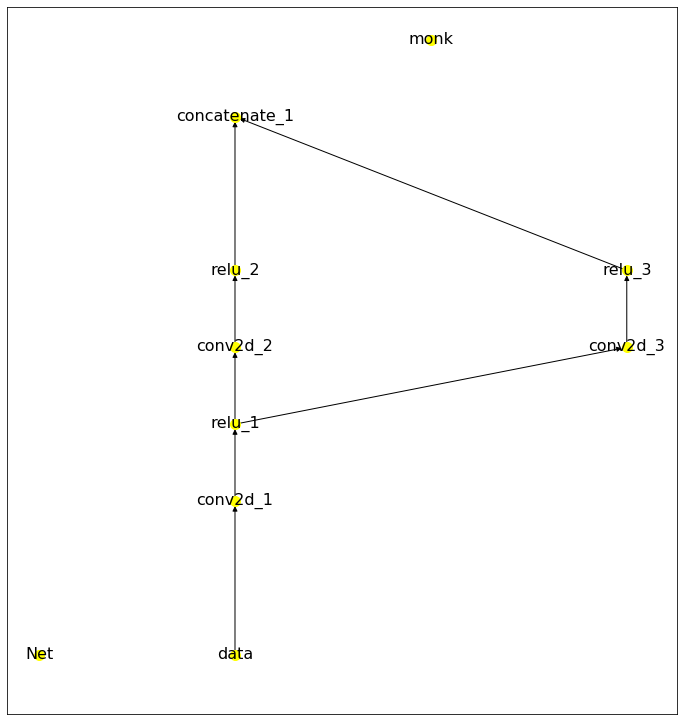

In [22]:
#Change gluon_prototype to pytorch_prototype
from pytorch_prototype import prototype


gtf = prototype(verbose=1);
gtf.Prototype("sample-project-1", "sample-experiment-1");


network = [];

# Single line addition of blocks
network.append(gtf.squeezenet_fire_block(squeeze_channels=16, 
                                         expand_channels_1x1=32, 
                                         expand_channels_3x3=64));


gtf.Compile_Network(network, data_shape=(3, 224, 224), use_gpu=False);

<a id='4-3'></a>
## Keras backend

  - Only the import changes

Keras Version: 2.2.5
Tensorflow Version: 1.12.0

Experiment Details
    Project: sample-project-1
    Experiment: sample-experiment-1
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/blocks/workspace/sample-project-1/sample-experiment-1/

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           Custom Model
        Num layers in model:  8
        Num trainable layers: 7



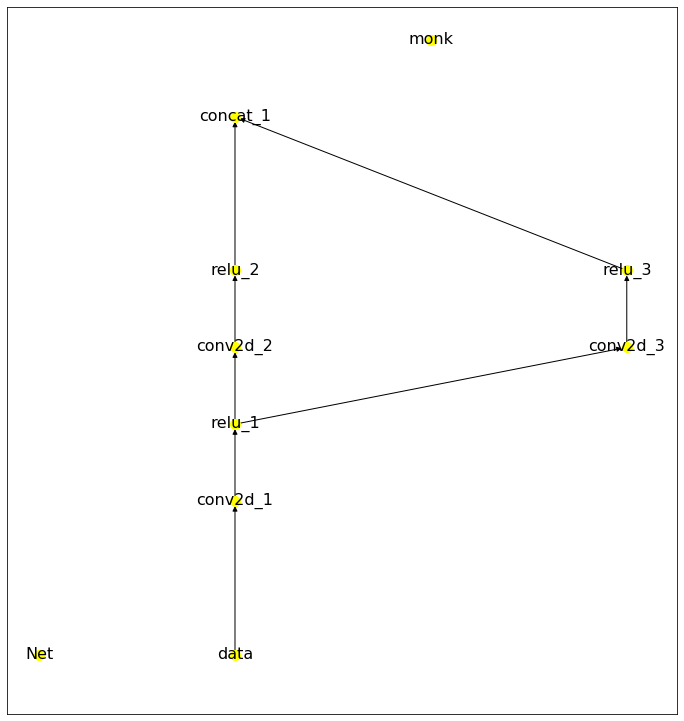

In [23]:
#Change gluon_prototype to keras_prototype
from keras_prototype import prototype


gtf = prototype(verbose=1);
gtf.Prototype("sample-project-1", "sample-experiment-1");


network = [];

# Single line addition of blocks
network.append(gtf.squeezenet_fire_block(squeeze_channels=16, 
                                         expand_channels_1x1=32, 
                                         expand_channels_3x3=64));


gtf.Compile_Network(network, data_shape=(3, 224, 224), use_gpu=False);

<a id='5'></a>
# Appendix

<a id='5-1'></a>
## Study links
  - https://towardsdatascience.com/review-squeezenet-image-classification-e7414825581a
  - https://www.kdnuggets.com/2016/09/deep-learning-reading-group-squeezenet.html
  - https://medium.com/@smallfishbigsea/notes-of-squeezenet-4137d51feef4
  - https://www.researchgate.net/figure/The-structure-of-the-Fire-module-used-in-SqueezeNet_fig4_328548960

<a id='5-2'></a>
## Creating block using traditional Mxnet

 - Code credits - https://mxnet.incubator.apache.org/

In [24]:
# Traditional-Mxnet-gluon
import mxnet as mx
from mxnet.gluon import nn
from mxnet.gluon.nn import HybridBlock, BatchNorm
from mxnet.gluon.contrib.nn import HybridConcurrent, Identity
from mxnet import gluon, init, nd

In [25]:
# Helpers
def fire(squeeze_channels, expand1x1_channels, expand3x3_channels):
    out = nn.HybridSequential(prefix='')
    out.add(_make_fire_conv(squeeze_channels, 1))

    paths = HybridConcurrent(axis=1, prefix='')
    paths.add(_make_fire_conv(expand1x1_channels, 1))
    paths.add(_make_fire_conv(expand3x3_channels, 3, 1))
    out.add(paths)

    return out

def _make_fire_conv(channels, kernel_size, padding=0):
    out = nn.HybridSequential(prefix='')
    out.add(nn.Conv2D(channels, kernel_size, padding=padding))
    out.add(nn.Activation('relu'))
    return out

In [27]:
# Invoke the block
block = fire(32, 32, 64)

# Initialize network and load block on machine
ctx = [mx.cpu()];
block.initialize(init.Xavier(), ctx = ctx);
block.collect_params().reset_ctx(ctx)
block.hybridize()

# Run data through network
x = np.zeros((1, 3, 224, 224));
x = mx.nd.array(x);
y = block.forward(x);
print(x.shape, y.shape)


# Export Model to Load on Netron
block.export("final", epoch=0);

netron.start("final-symbol.json", port=8082)

(1, 3, 224, 224) (1, 96, 224, 224)
Serving 'final-symbol.json' at http://localhost:8082


<a id='5-3'></a>
## Creating block using traditional Pytorch

 - Code credits - https://pytorch.org/

In [28]:
# Traiditional-Pytorch
import torch
from torch import nn
from torch.jit.annotations import List
import torch.nn.functional as F

In [30]:
class Fire(nn.Module):

    def __init__(self, inplanes, squeeze_planes,
                 expand1x1_planes, expand3x3_planes):
        super(Fire, self).__init__()
        self.inplanes = inplanes
        self.squeeze = nn.Conv2d(inplanes, squeeze_planes, kernel_size=1)
        self.squeeze_activation = nn.ReLU(inplace=True)
        self.expand1x1 = nn.Conv2d(squeeze_planes, expand1x1_planes,
                                   kernel_size=1)
        self.expand1x1_activation = nn.ReLU(inplace=True)
        self.expand3x3 = nn.Conv2d(squeeze_planes, expand3x3_planes,
                                   kernel_size=3, padding=1)
        self.expand3x3_activation = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.squeeze_activation(self.squeeze(x))
        return torch.cat([
            self.expand1x1_activation(self.expand1x1(x)),
            self.expand3x3_activation(self.expand3x3(x))
        ], 1)

In [31]:
# Invoke the block
block = Fire(3, 32, 64, 96);

# Initialize network and load block on machine
layers = []
layers.append(block);
net = nn.Sequential(*layers);

# Run data through network
x = torch.randn(1, 3, 224, 224)
y = net(x)
print(x.shape, y.shape);

# Export Model to Load on Netron
torch.onnx.export(net,               # model being run
                  x,                         # model input (or a tuple for multiple inputs)
                  "model.onnx",   # where to save the model (can be a file or file-like object)
                  export_params=True,        # store the trained parameter weights inside the model file
                  opset_version=10,          # the ONNX version to export the model to
                  do_constant_folding=True,  # whether to execute constant folding for optimization
                  input_names = ['input'],   # the model's input names
                  output_names = ['output'], # the model's output names
                  dynamic_axes={'input' : {0 : 'batch_size'},    # variable lenght axes
                                'output' : {0 : 'batch_size'}})
netron.start('model.onnx', port=9998);


torch.Size([1, 3, 224, 224]) torch.Size([1, 160, 224, 224])
Serving 'model.onnx' at http://localhost:9998


<a id='5-4'></a>
## Creating block using traditional Keras

 - Code credits: https://github.com/rcmalli/keras-squeezenet

In [40]:
# Traditional-Keras
import keras
import keras.layers as kla
import keras.models as kmo
import tensorflow as tf
from keras.models import Model
from keras.layers import *
backend = 'channels_last'
from keras import layers
from keras import backend as K 

In [41]:
sq1x1 = "squeeze1x1"
exp1x1 = "expand1x1"
exp3x3 = "expand3x3"
relu = "relu_"


def fire_module(x, fire_id, squeeze=16, expand=64):
    s_id = 'fire' + str(fire_id) + '/'

    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = 3
    
    x = Convolution2D(squeeze, (1, 1), padding='valid', name=s_id + sq1x1)(x)
    x = Activation('relu', name=s_id + relu + sq1x1)(x)

    left = Convolution2D(expand, (1, 1), padding='valid', name=s_id + exp1x1)(x)
    left = Activation('relu', name=s_id + relu + exp1x1)(left)

    right = Convolution2D(expand, (3, 3), padding='same', name=s_id + exp3x3)(x)
    right = Activation('relu', name=s_id + relu + exp3x3)(right)

    x = concatenate([left, right], axis=channel_axis, name=s_id + 'concat')
    return x


def create_model(input_shape, squeeze=16, expand=64):
    img_input = layers.Input(shape=input_shape);
    x = fire_module(img_input, 'fire', squeeze=16, expand=64)    
    return Model(img_input, x);

In [42]:
# Invoke the block
input_shape=(224, 224, 3);
model = create_model(input_shape, squeeze=16, expand=64);

# Run data through network
x = tf.placeholder(tf.float32, shape=(1, 224, 224, 3))
y = model(x)
print(x.shape, y.shape)

# Export Model to Load on Netron
model.save("final.h5");
netron.start("final.h5", port=8082)

(1, 224, 224, 3) (1, 224, 224, 128)

Stopping http://localhost:8082
Serving 'final.h5' at http://localhost:8082
